**Lab Exercise 2**

/tmp/ipython-input-2-3227998583.py:124: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


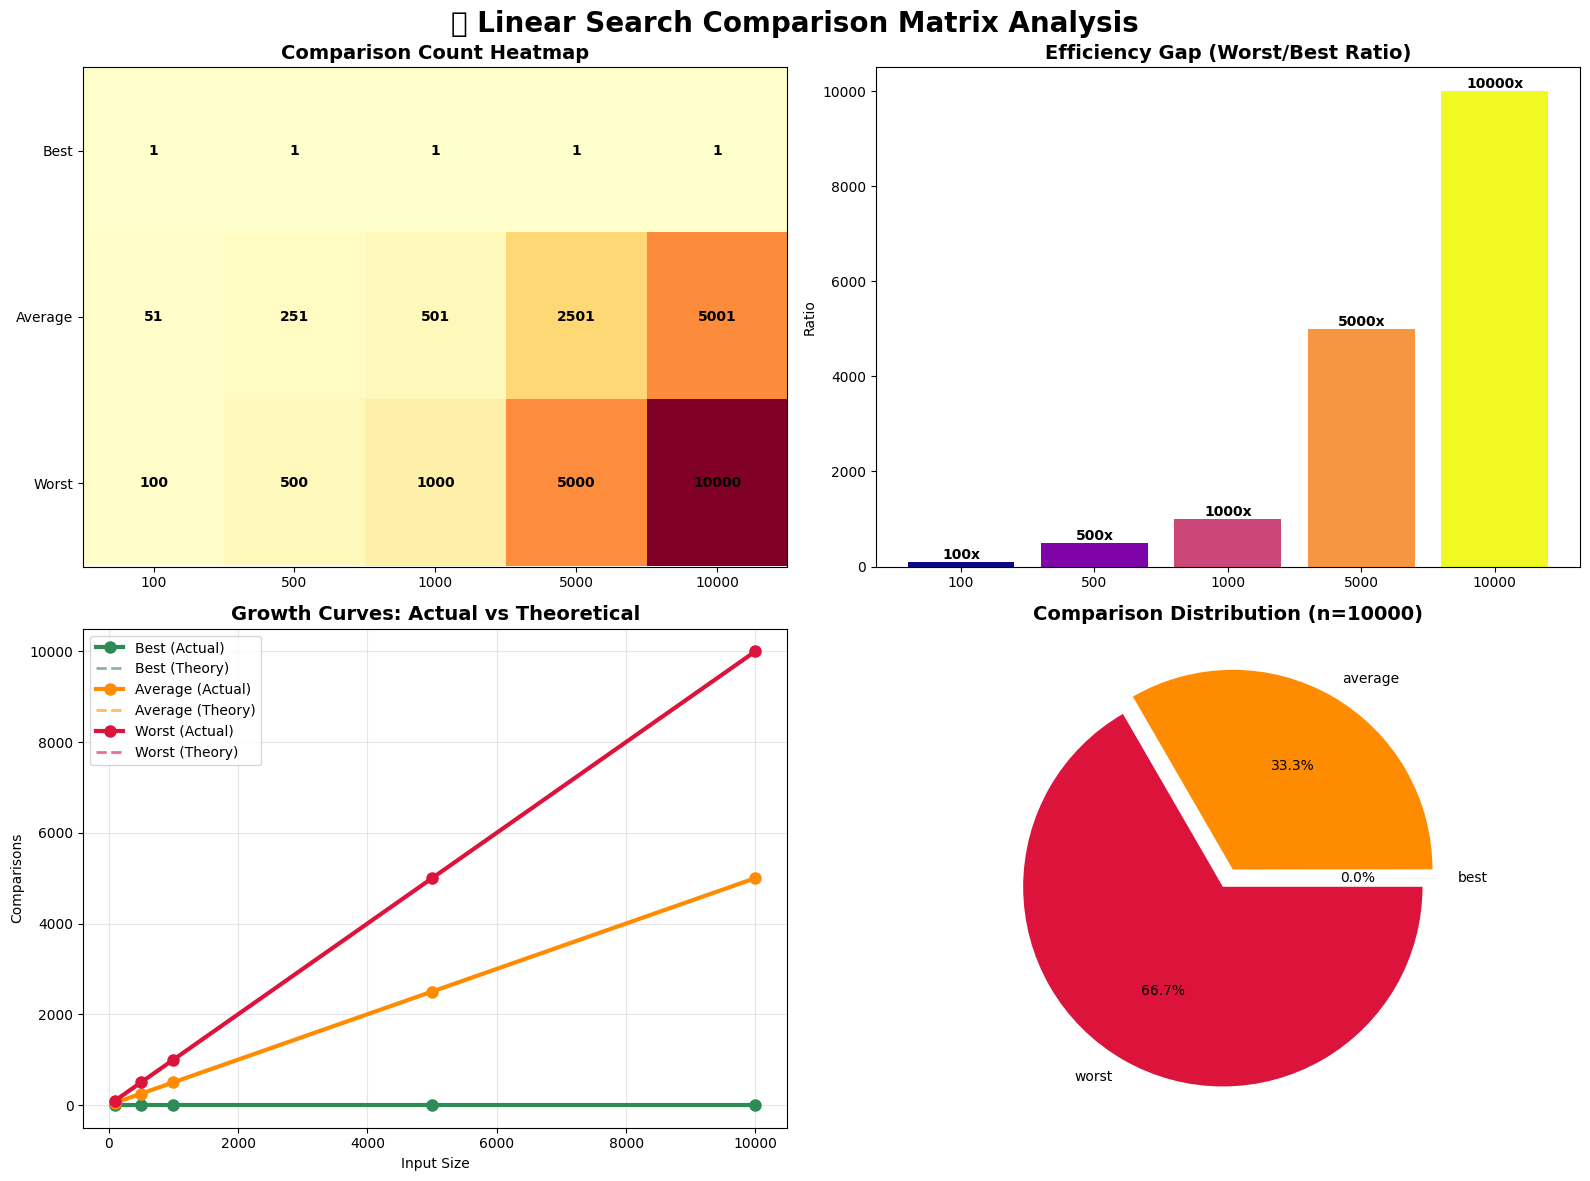

/tmp/ipython-input-2-3227998583.py:156: UserWarning: Glyph 129767 (\N{BUBBLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129767 (\N{BUBBLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


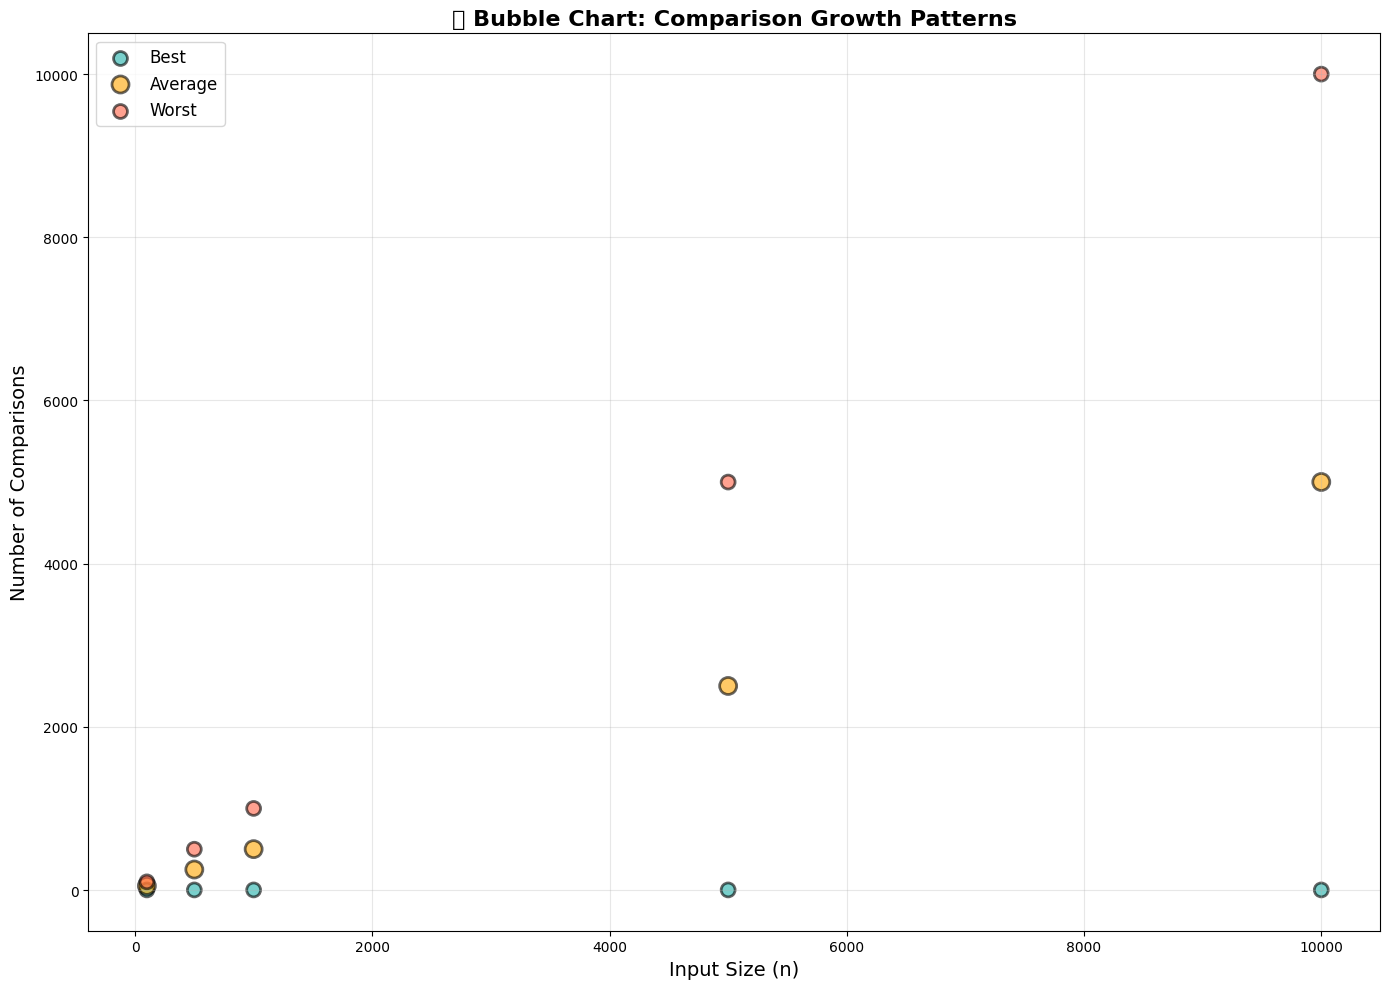

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


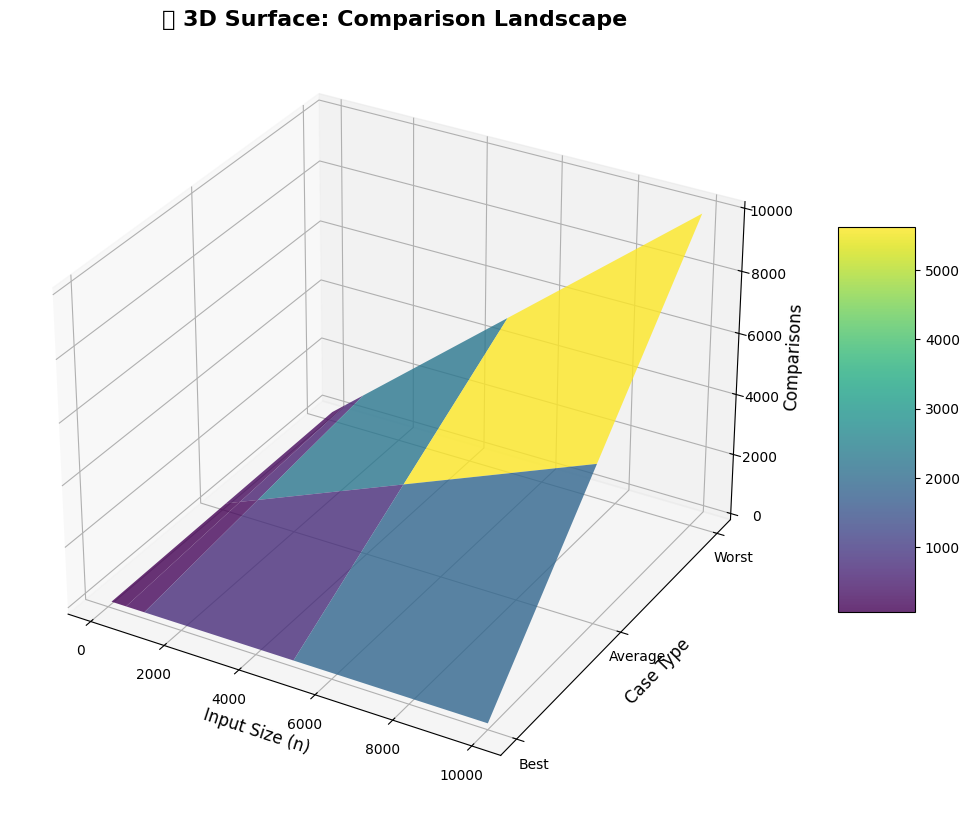

/tmp/ipython-input-2-3227998583.py:221: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


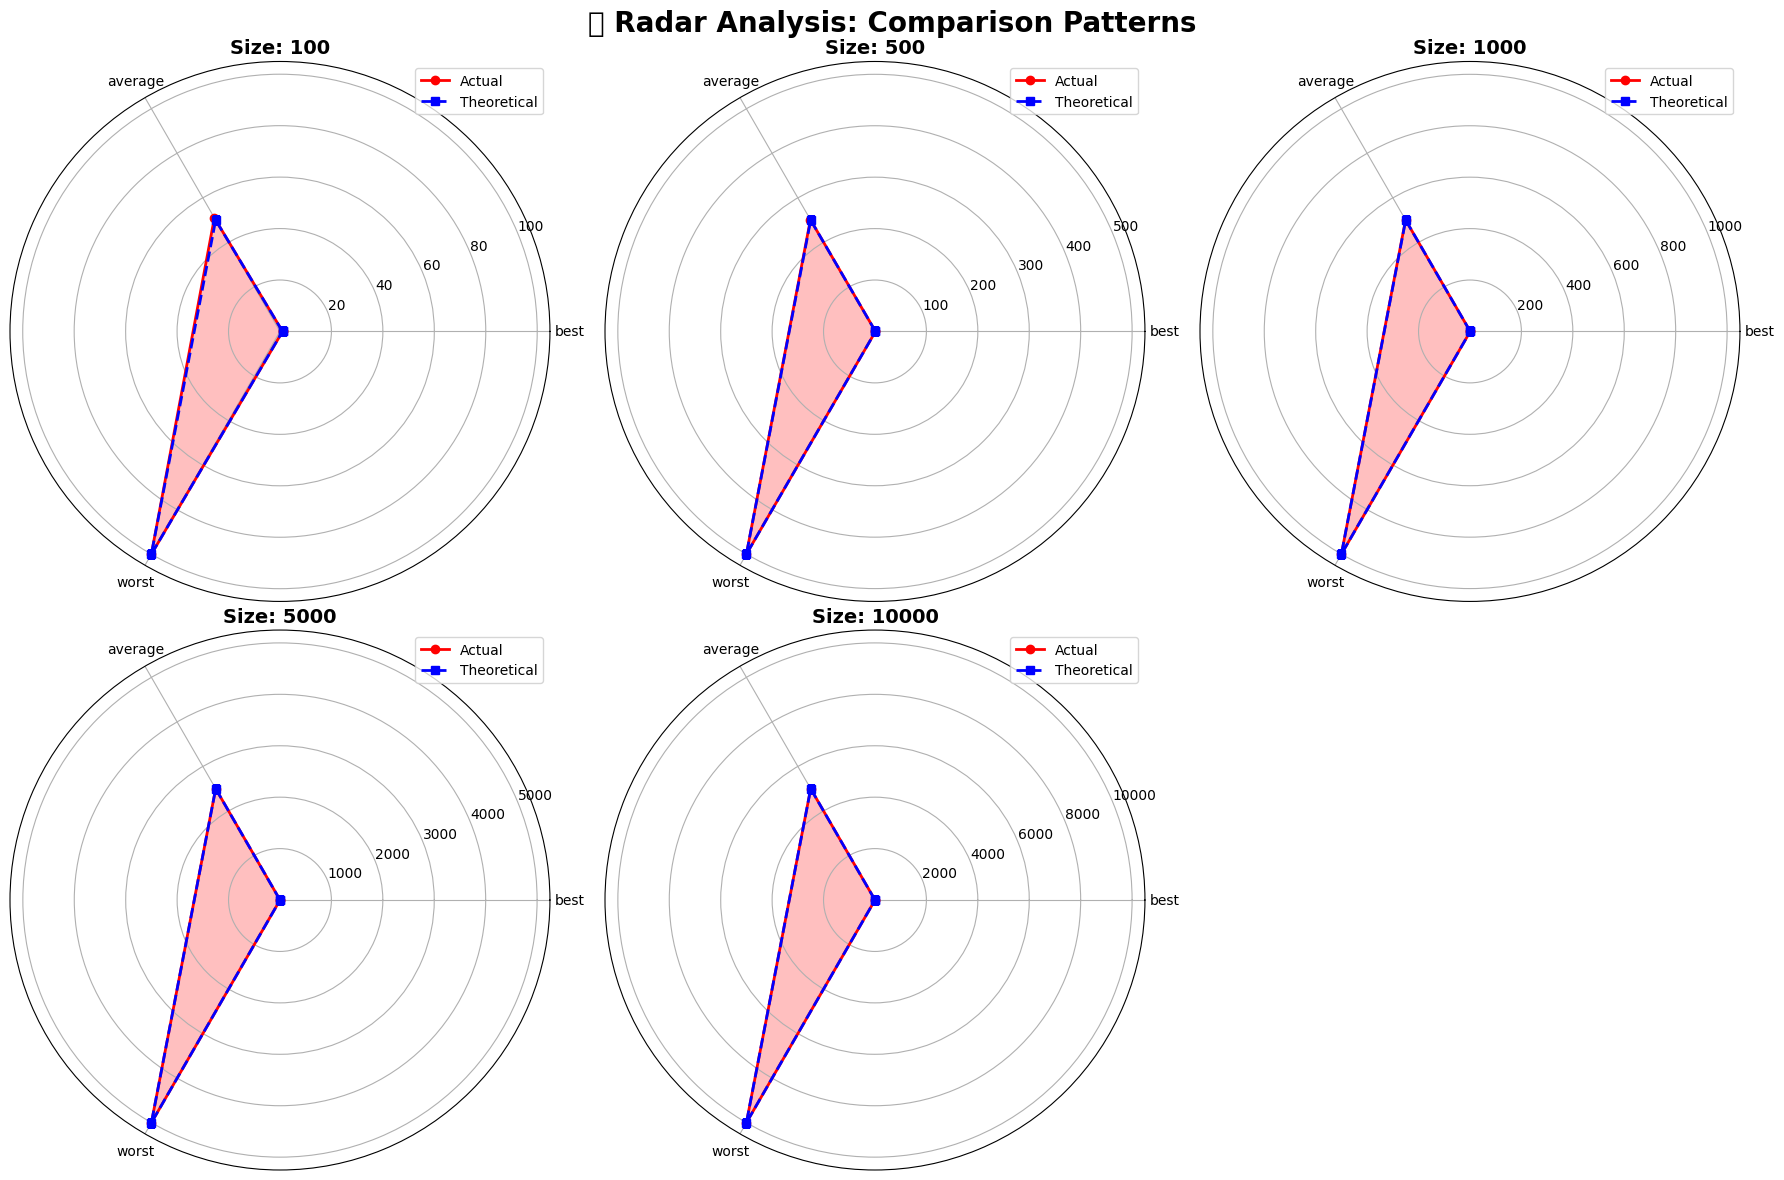

/tmp/ipython-input-2-3227998583.py:289: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


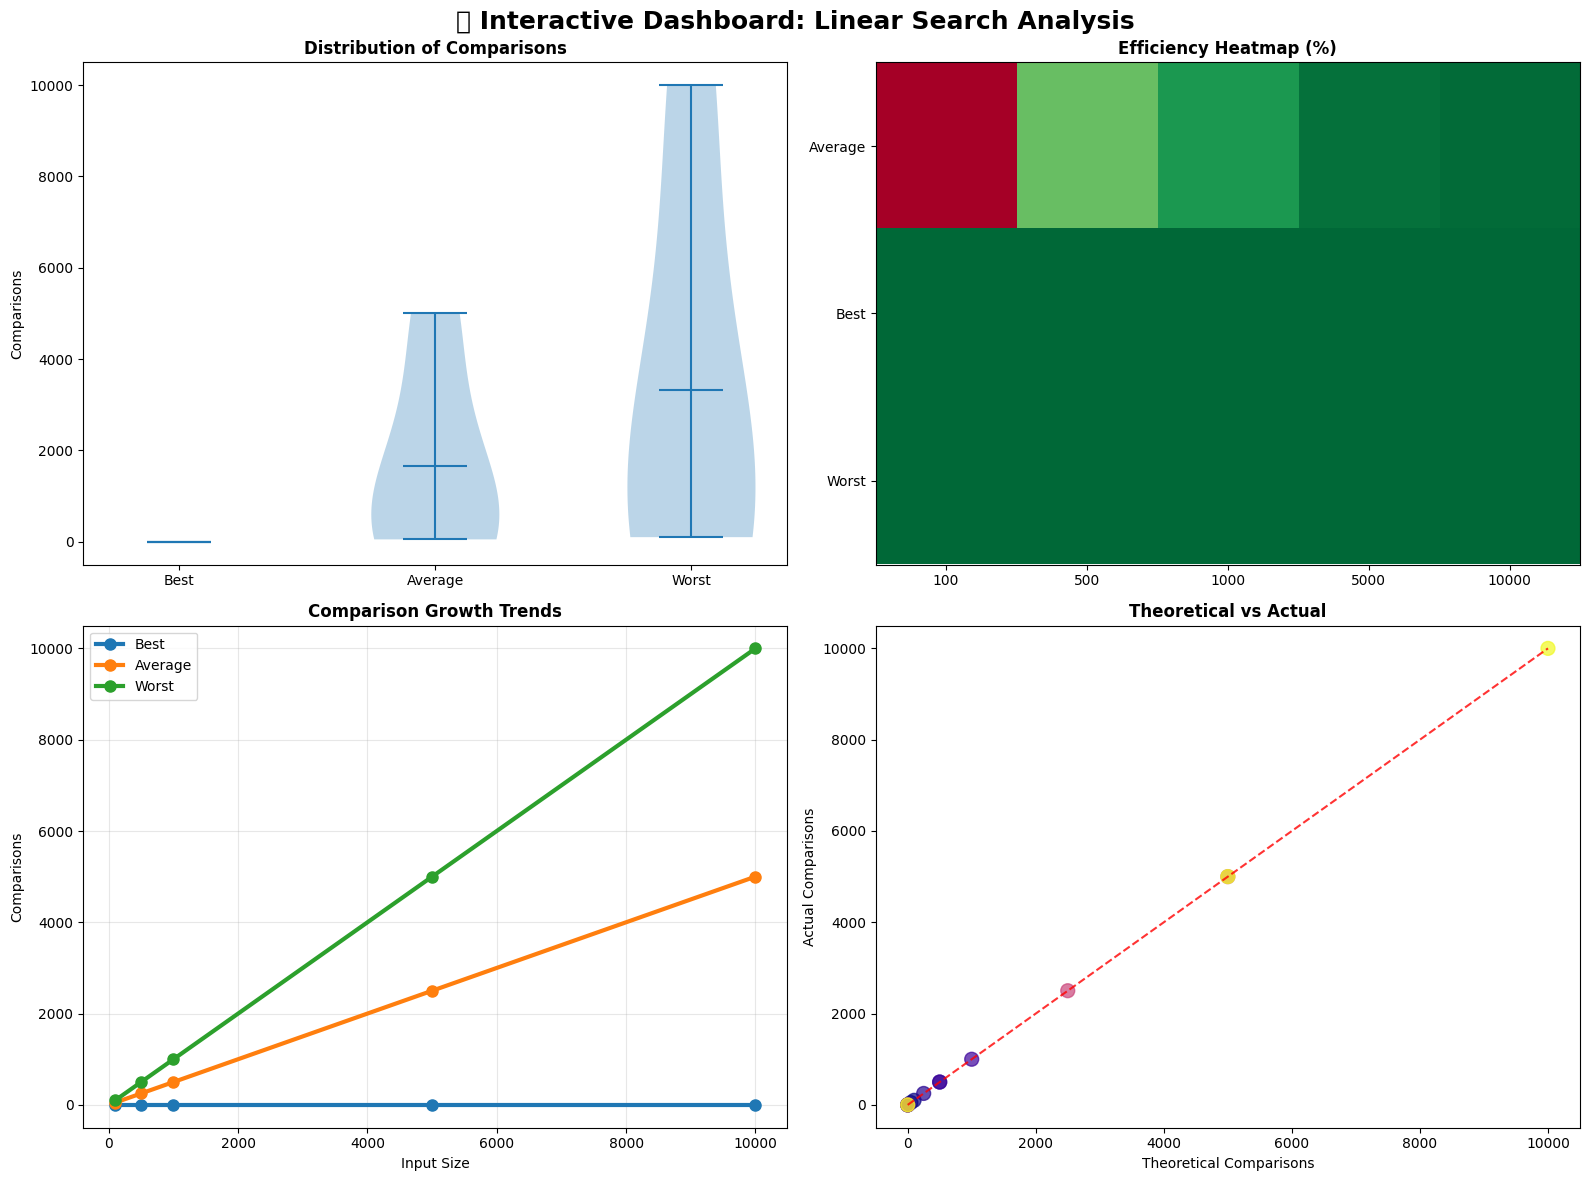

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Rectangle
import seaborn as sns
from matplotlib.animation import FuncAnimation
import pandas as pd

class LinearSearchAnalyzer:
    def __init__(self):
        self.results = {}
        self.comparison_history = []

    def search_with_visualization(self, arr, target):
        comparisons = 0
        positions_checked = []

        for i in range(len(arr)):
            comparisons += 1
            positions_checked.append(i)
            if arr[i] == target:
                return i, comparisons, positions_checked
        return -1, comparisons, positions_checked

    def generate_test_scenarios(self, n):
        base_array = list(range(1, n + 1))
        random.shuffle(base_array)

        scenarios = {
            'best': {'array': base_array, 'target': base_array[0], 'description': 'Element at first position'},
            'average': {'array': base_array, 'target': base_array[n//2], 'description': 'Element in middle'},
            'worst': {'array': base_array, 'target': max(base_array) + 1, 'description': 'Element not found'}
        }
        return scenarios

    def run_experiments(self, sizes=[100, 500, 1000, 5000, 10000]):
        for size in sizes:
            scenarios = self.generate_test_scenarios(size)
            self.results[size] = {}

            for case_type, scenario in scenarios.items():
                idx, comps, positions = self.search_with_visualization(scenario['array'], scenario['target'])
                self.results[size][case_type] = {
                    'comparisons': comps,
                    'positions_checked': positions,
                    'found_at': idx,
                    'theoretical': self.get_theoretical_value(size, case_type)
                }

    def get_theoretical_value(self, n, case_type):
        theoretical_map = {'best': 1, 'average': n/2, 'worst': n}
        return theoretical_map[case_type]

    def create_heatmap_visualization(self):
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('🔍 Linear Search Comparison Matrix Analysis', fontsize=20, fontweight='bold')

        sizes = list(self.results.keys())
        cases = ['best', 'average', 'worst']

        # Heatmap of comparisons
        comparison_matrix = np.zeros((len(cases), len(sizes)))
        for i, case in enumerate(cases):
            for j, size in enumerate(sizes):
                comparison_matrix[i, j] = self.results[size][case]['comparisons']

        im1 = axes[0, 0].imshow(comparison_matrix, cmap='YlOrRd', aspect='auto')
        axes[0, 0].set_title('Comparison Count Heatmap', fontsize=14, fontweight='bold')
        axes[0, 0].set_xticks(range(len(sizes)))
        axes[0, 0].set_xticklabels(sizes)
        axes[0, 0].set_yticks(range(len(cases)))
        axes[0, 0].set_yticklabels([c.capitalize() for c in cases])

        for i in range(len(cases)):
            for j in range(len(sizes)):
                axes[0, 0].text(j, i, f'{int(comparison_matrix[i, j])}',
                              ha='center', va='center', fontweight='bold')

        # Efficiency ratio visualization
        efficiency_data = []
        for size in sizes:
            worst_comps = self.results[size]['worst']['comparisons']
            best_comps = self.results[size]['best']['comparisons']
            efficiency_data.append(worst_comps / best_comps)

        bars = axes[0, 1].bar(range(len(sizes)), efficiency_data,
                             color=plt.cm.plasma(np.linspace(0, 1, len(sizes))))
        axes[0, 1].set_title('Efficiency Gap (Worst/Best Ratio)', fontsize=14, fontweight='bold')
        axes[0, 1].set_xticks(range(len(sizes)))
        axes[0, 1].set_xticklabels(sizes)
        axes[0, 1].set_ylabel('Ratio')

        for bar, ratio in zip(bars, efficiency_data):
            axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                           f'{ratio:.0f}x', ha='center', va='bottom', fontweight='bold')

        # Growth curves with theoretical overlay
        colors = {'best': '#2E8B57', 'average': '#FF8C00', 'worst': '#DC143C'}

        for case in cases:
            actual_values = [self.results[size][case]['comparisons'] for size in sizes]
            theoretical_values = [self.results[size][case]['theoretical'] for size in sizes]

            axes[1, 0].plot(sizes, actual_values, 'o-', color=colors[case],
                           linewidth=3, markersize=8, label=f'{case.capitalize()} (Actual)')
            axes[1, 0].plot(sizes, theoretical_values, '--', color=colors[case],
                           alpha=0.6, linewidth=2, label=f'{case.capitalize()} (Theory)')

        axes[1, 0].set_title('Growth Curves: Actual vs Theoretical', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Input Size')
        axes[1, 0].set_ylabel('Comparisons')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        # Comparison distribution pie chart for largest size
        largest_size = max(sizes)
        comparison_counts = [self.results[largest_size][case]['comparisons'] for case in cases]

        wedges, texts, autotexts = axes[1, 1].pie(comparison_counts, labels=cases, autopct='%1.1f%%',
                                                 colors=[colors[case] for case in cases],
                                                 explode=(0.05, 0.05, 0.05))
        axes[1, 1].set_title(f'Comparison Distribution (n={largest_size})', fontsize=14, fontweight='bold')

        plt.tight_layout()
        plt.show()

    def create_bubble_chart(self):
        fig, ax = plt.subplots(figsize=(14, 10))

        sizes = list(self.results.keys())
        cases = ['best', 'average', 'worst']
        colors = {'best': '#20B2AA', 'average': '#FFA500', 'worst': '#FF6347'}

        for case in cases:
            x_vals = []
            y_vals = []
            bubble_sizes = []

            for size in sizes:
                comparisons = self.results[size][case]['comparisons']
                theoretical = self.results[size][case]['theoretical']

                x_vals.append(size)
                y_vals.append(comparisons)
                bubble_sizes.append(abs(comparisons - theoretical) * 50 + 100)

            ax.scatter(x_vals, y_vals, s=bubble_sizes, c=colors[case],
                      alpha=0.6, edgecolors='black', linewidth=2, label=case.capitalize())

        ax.set_xlabel('Input Size (n)', fontsize=14)
        ax.set_ylabel('Number of Comparisons', fontsize=14)
        ax.set_title('🫧 Bubble Chart: Comparison Growth Patterns', fontsize=16, fontweight='bold')
        ax.legend(fontsize=12)
        ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def create_3d_surface_plot(self):
        fig = plt.figure(figsize=(15, 10))
        ax = fig.add_subplot(111, projection='3d')

        sizes = np.array(list(self.results.keys()))
        cases_numeric = np.array([0, 1, 2])  # best, average, worst

        X, Y = np.meshgrid(sizes, cases_numeric)
        Z = np.zeros_like(X, dtype=float)

        cases = ['best', 'average', 'worst']
        for i, case in enumerate(cases):
            for j, size in enumerate(sizes):
                Z[i, j] = self.results[size][case]['comparisons']

        surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

        ax.set_xlabel('Input Size (n)', fontsize=12)
        ax.set_ylabel('Case Type', fontsize=12)
        ax.set_zlabel('Comparisons', fontsize=12)
        ax.set_title('🌊 3D Surface: Comparison Landscape', fontsize=16, fontweight='bold')

        ax.set_yticks([0, 1, 2])
        ax.set_yticklabels(['Best', 'Average', 'Worst'])

        fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
        plt.show()

    def create_radar_chart(self):
        sizes = list(self.results.keys())
        cases = ['best', 'average', 'worst']

        fig, axes = plt.subplots(2, 3, figsize=(18, 12), subplot_kw=dict(projection='polar'))
        fig.suptitle('🎯 Radar Analysis: Comparison Patterns', fontsize=20, fontweight='bold')

        angles = np.linspace(0, 2 * np.pi, len(cases), endpoint=False).tolist()
        angles += angles[:1]  # Complete the circle

        for idx, size in enumerate(sizes):
            row = idx // 3
            col = idx % 3
            ax = axes[row, col]

            values = [self.results[size][case]['comparisons'] for case in cases]
            theoretical = [self.results[size][case]['theoretical'] for case in cases]

            values += values[:1]  # Complete the circle
            theoretical += theoretical[:1]

            ax.plot(angles, values, 'o-', linewidth=2, label='Actual', color='red')
            ax.fill(angles, values, alpha=0.25, color='red')
            ax.plot(angles, theoretical, 's--', linewidth=2, label='Theoretical', color='blue')

            ax.set_xticks(angles[:-1])
            ax.set_xticklabels(cases)
            ax.set_title(f'Size: {size}', fontsize=14, fontweight='bold')
            ax.legend()
            ax.grid(True)

        if len(sizes) == 5:
            axes[1, 2].axis('off')

        plt.tight_layout()
        plt.show()

    def generate_summary_dataframe(self):
        data = []
        for size in self.results.keys():
            for case in ['best', 'average', 'worst']:
                data.append({
                    'Size': size,
                    'Case': case.capitalize(),
                    'Actual_Comparisons': self.results[size][case]['comparisons'],
                    'Theoretical_Comparisons': self.results[size][case]['theoretical'],
                    'Efficiency_Score': (self.results[size][case]['theoretical'] /
                                        self.results[size][case]['comparisons']) * 100 if self.results[size][case]['comparisons'] > 0 else 100
                })

        df = pd.DataFrame(data)
        return df

    def create_interactive_dashboard(self):
        df = self.generate_summary_dataframe()

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('📊 Interactive Dashboard: Linear Search Analysis', fontsize=18, fontweight='bold')

        # Violin plot
        sizes = df['Size'].unique()
        best_data = df[df['Case'] == 'Best']['Actual_Comparisons']
        avg_data = df[df['Case'] == 'Average']['Actual_Comparisons']
        worst_data = df[df['Case'] == 'Worst']['Actual_Comparisons']

        parts = axes[0, 0].violinplot([best_data, avg_data, worst_data],
                                     positions=[1, 2, 3], showmeans=True)
        axes[0, 0].set_xticks([1, 2, 3])
        axes[0, 0].set_xticklabels(['Best', 'Average', 'Worst'])
        axes[0, 0].set_title('Distribution of Comparisons', fontweight='bold')
        axes[0, 0].set_ylabel('Comparisons')

        # Efficiency heatmap
        pivot_df = df.pivot(index='Case', columns='Size', values='Efficiency_Score')
        im = axes[0, 1].imshow(pivot_df.values, cmap='RdYlGn', aspect='auto')
        axes[0, 1].set_title('Efficiency Heatmap (%)', fontweight='bold')
        axes[0, 1].set_xticks(range(len(pivot_df.columns)))
        axes[0, 1].set_xticklabels(pivot_df.columns)
        axes[0, 1].set_yticks(range(len(pivot_df.index)))
        axes[0, 1].set_yticklabels(pivot_df.index)

        # Comparison trend
        for case in ['Best', 'Average', 'Worst']:
            case_data = df[df['Case'] == case]
            axes[1, 0].plot(case_data['Size'], case_data['Actual_Comparisons'],
                           'o-', linewidth=3, markersize=8, label=case)

        axes[1, 0].set_title('Comparison Growth Trends', fontweight='bold')
        axes[1, 0].set_xlabel('Input Size')
        axes[1, 0].set_ylabel('Comparisons')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        # Theoretical vs Actual scatter
        axes[1, 1].scatter(df['Theoretical_Comparisons'], df['Actual_Comparisons'],
                          c=df['Size'], s=100, alpha=0.7, cmap='plasma')
        axes[1, 1].plot([0, df['Theoretical_Comparisons'].max()],
                       [0, df['Theoretical_Comparisons'].max()], 'r--', alpha=0.8)
        axes[1, 1].set_title('Theoretical vs Actual', fontweight='bold')
        axes[1, 1].set_xlabel('Theoretical Comparisons')
        axes[1, 1].set_ylabel('Actual Comparisons')

        plt.tight_layout()
        plt.show()

        return df

def main():
    analyzer = LinearSearchAnalyzer()
    analyzer.run_experiments()

    analyzer.create_heatmap_visualization()
    analyzer.create_bubble_chart()
    analyzer.create_3d_surface_plot()
    analyzer.create_radar_chart()

    df = analyzer.create_interactive_dashboard()

    return analyzer, df

if __name__ == "__main__":
    analyzer, summary_df = main()